In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Read the dataset directly
file_path = 'df.csv'
df = pd.read_csv(file_path)

In [2]:
# Group the data and include min and max in the aggregation
grouped_data = df.groupby(['transcript_id', 'transcript_position']).agg({
    'dwelling_time1': ['mean', 'std', 'min', 'max'],
    'sd1': ['mean', 'std', 'min', 'max'],
    'mean1': ['mean', 'std', 'min', 'max'],
    'dwelling_time2': ['mean', 'std', 'min', 'max'],
    'sd2': ['mean', 'std', 'min', 'max'],
    'mean2': ['mean', 'std', 'min', 'max'],
    'dwelling_time3': ['mean', 'std', 'min', 'max'],
    'sd3': ['mean', 'std', 'min', 'max'],
    'mean3': ['mean', 'std', 'min', 'max'],
    'label': lambda x: x.mode()[0] if not x.mode().empty else None
}).reset_index()

# Sample 20 groups
sampled_groups = grouped_data.sample(n=20)

# Reset the index to get 'transcript_id' and 'transcript_position' as columns
sampled_groups_reset = sampled_groups.reset_index()

# Melt the DataFrame for boxplot
melted_sampled_groups = sampled_groups_reset.melt(id_vars=['transcript_id', 'transcript_position'], var_name='Feature', value_name='Value')

# Concatenate 'transcript_id' and 'transcript_position' for group identification
melted_sampled_groups['Group'] = melted_sampled_groups['transcript_id'].astype(str) + "_" + melted_sampled_groups['transcript_position'].astype(str)

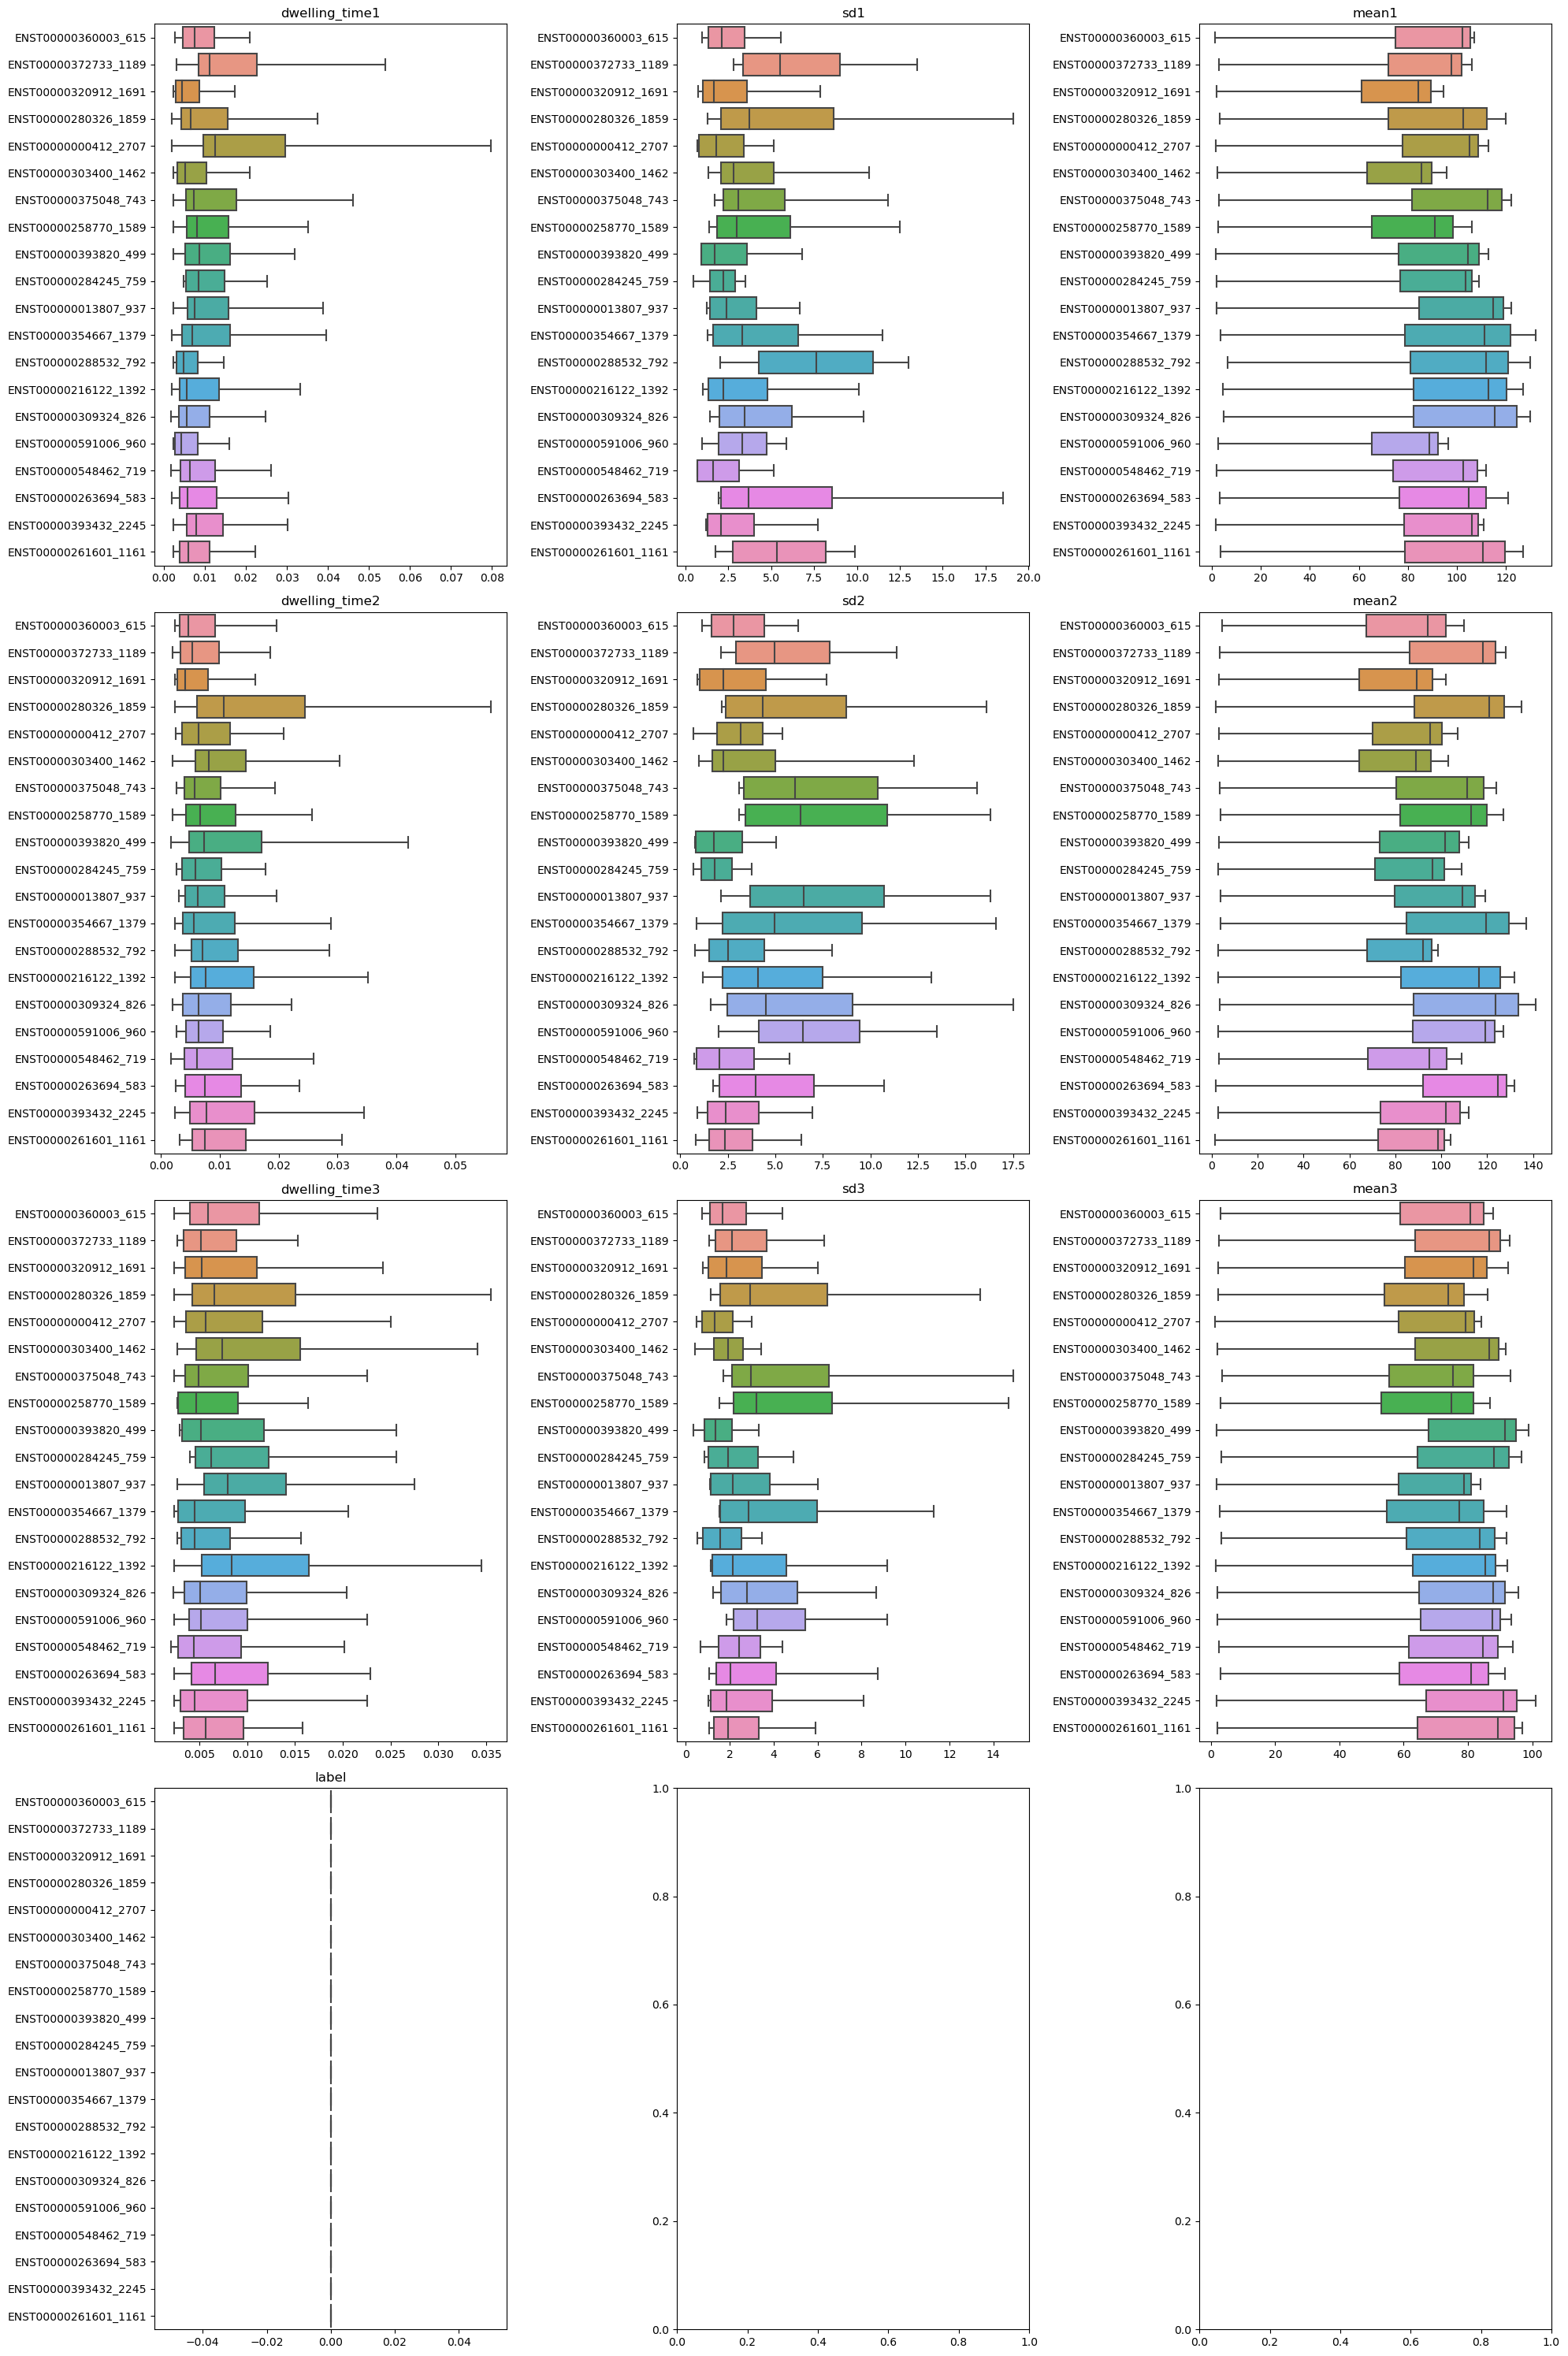

In [3]:
# Plotting boxplots for each feature
fig, axes = plt.subplots(4, 3, figsize=(20, 30))
axes = axes.flatten()
columns = ['dwelling_time1', 'sd1', 'mean1', 'dwelling_time2', 'sd2', 'mean2', 'dwelling_time3', 'sd3', 'mean3', 'label']

for i, (feature, ax) in enumerate(zip(columns, axes)):
    # Filter data for the specific feature
    feature_data = melted_sampled_groups[melted_sampled_groups['Feature'].str.contains(feature)]
    
    sns.boxplot(
        x='Value', 
        y='Group', 
        data=feature_data,
        ax=ax,
        whis=[0, 100]  # This will ensure that the whiskers represent the min and max values
    )
    ax.set_title(feature)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

### mean and std, no dimensionality reduction

In [15]:
def get_summary_mean_std(df):
    count_df1 = df.groupby(['transcript_id', 'transcript_position']).size().reset_index(name='read_count')
    count_df2 = df.groupby(['transcript_id']).size().reset_index(name='expression_count') #most genes are likely to produce unique transcripts
    df = df.merge(count_df1, on=['transcript_id', 'transcript_position'])
    df = df.merge(count_df2, on=['transcript_id'])
    
    summary_df = df.groupby(['transcript_id', 'transcript_position']).agg({
        'gene_id': 'first',
        'combined nucleotides': 'first',
        'dwelling_time1': ['mean', 'std'],
        'sd1': ['mean', 'std'],
        'mean1': ['mean', 'std'],
        'dwelling_time2': ['mean', 'std'],
        'sd2': ['mean', 'std'],
        'mean2': ['mean', 'std'],
        'dwelling_time3': ['mean', 'std'],
        'sd3': ['mean', 'std'],
        'mean3': ['mean', 'std'],
        'label': lambda x: x.mode()[0] if not x.mode().empty else None
    }).reset_index()
    summary_df.columns = summary_df.columns.map('_'.join)
    summary_df = summary_df.rename(columns={'label_<lambda>': 'label',
                                           'transcript_id_': 'transcript_id',
                                           'transcript_position_': 'transcript_position',
                                           'gene_id_first': 'gene_id',
                                           'combined nucleotides_first': 'combined nucleotides'})
    
    return summary_df

In [33]:
summary_mean_std = get_summary_mean_std(df)

In [22]:
summary_mean_std

,transcript_id,transcript_position,gene_id,combined nucleotides,dwelling_time1_mean,dwelling_time1_std,sd1_mean,sd1_std,mean1_mean,mean1_std,...,sd2_std,mean2_mean,mean2_std,dwelling_time3_mean,dwelling_time3_std,sd3_mean,sd3_std,mean3_mean,mean3_std,label
0,ENST00000000233,244,ENSG00000004059,AAGACCA,0.008264,0.005399,4.223784,1.848027,123.702703,4.957783,...,3.311633,125.913514,2.772748,0.007345,0.004578,4.386989,2.914112,80.570270,2.529013,0
1,ENST00000000233,261,ENSG00000004059,CAAACTG,0.006609,0.003599,3.216424,1.694099,109.681395,2.989886,...,1.240656,107.889535,3.536825,0.007710,0.004541,3.016599,1.470576,94.290698,2.499807,0
2,ENST00000000233,316,ENSG00000004059,GAAACAG,0.007570,0.004456,2.940541,1.314661,105.475676,1.496628,...,0.895906,98.947027,3.212510,0.007555,0.004509,2.087146,0.802669,89.364324,1.488369,0
3,ENST00000000233,332,ENSG00000004059,AGAACAT,0.010620,0.006136,6.476350,2.465488,129.355000,3.211001,...,1.397366,97.836500,1.932847,0.006101,0.003604,2.236520,0.743633,89.154000,3.503707,0
4,ENST00000000233,368,ENSG00000004059,AGGACAA,0.010701,0.007169,6.415051,2.750181,117.924242,2.671397,...,1.758340,121.954545,2.182755,0.010019,0.005923,4.260253,1.345223,85.178788,2.385075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121833,ENST00000641834,1348,ENSG00000167747,GGGACAT,0.009594,0.006178,3.294164,1.112235,118.232877,2.163591,...,2.038680,116.342466,4.913754,0.006555,0.004894,4.005616,1.832524,82.004110,3.721277,1
121834,ENST00000641834,1429,ENSG00000167747,CTGACAC,0.008393,0.005625,4.511014,2.292448,110.969565,3.630642,...,1.983764,114.927536,3.639323,0.005568,0.003136,3.644638,1.042674,80.497101,2.815606,0
121835,ENST00000641834,1531,ENSG00000167747,TGGACAC,0.008161,0.005521,3.918438,1.209888,113.968750,2.487867,...,1.936852,113.562500,2.810835,0.006410,0.003938,2.181563,1.011689,84.190625,1.855555,1
121836,ENST00000641834,1537,ENSG00000167747,CTGACCA,0.008044,0.007090,3.191228,1.016907,109.354386,3.914445,...,2.346295,123.263158,3.720245,0.006472,0.002648,2.540877,1.119528,82.289474,2.285332,0


In [35]:
def sequence_to_features(seq):
    """
    Convert a 7-letter sequence into binary features for the first and last letters.
    
    Parameters:
    - seq: A string of 7 letters (A, T, C, G)
    
    Returns:
    - A dictionary with binary features for the first and last letters.
    """
    letters = ['A', 'T', 'C', 'G']
    features = {}
    
    first_char = seq[0]
    last_char = seq[-1]
    
    for letter in letters:
        features[f"1{letter}"] = first_char == letter
        features[f"7{letter}"] = last_char == letter
            
    return features

In [37]:
def get_5_mer_first_last(df):
    df['5-mer'] = df['combined nucleotides'].apply(lambda x: x[1:-1])
    df = pd.get_dummies(df, columns=['5-mer'], drop_first=False)
    feature_dicts = df['combined nucleotides'].apply(sequence_to_features)
    features_df = feature_dicts.apply(pd.Series)
    df = pd.concat([df, features_df], axis=1)
    df = df.drop(columns=['combined nucleotides'])
    
    return df

In [38]:
summary_mean_std = get_5_mer_first_last(summary_mean_std)
summary_mean_std

,transcript_id,transcript_position,gene_id,dwelling_time1_mean,dwelling_time1_std,sd1_mean,sd1_std,mean1_mean,mean1_std,dwelling_time2_mean,...,5-mer_TGACC,5-mer_TGACT,1A,7A,1T,7T,1C,7C,1G,7G
0,ENST00000000233,244,ENSG00000004059,0.008264,0.005399,4.223784,1.848027,123.702703,4.957783,0.009373,...,False,False,True,True,False,False,False,False,False,False
1,ENST00000000233,261,ENSG00000004059,0.006609,0.003599,3.216424,1.694099,109.681395,2.989886,0.006813,...,False,False,False,False,False,False,True,False,False,True
2,ENST00000000233,316,ENSG00000004059,0.007570,0.004456,2.940541,1.314661,105.475676,1.496628,0.007416,...,False,False,False,False,False,False,False,False,True,True
3,ENST00000000233,332,ENSG00000004059,0.010620,0.006136,6.476350,2.465488,129.355000,3.211001,0.008632,...,False,False,True,False,False,True,False,False,False,False
4,ENST00000000233,368,ENSG00000004059,0.010701,0.007169,6.415051,2.750181,117.924242,2.671397,0.011479,...,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121833,ENST00000641834,1348,ENSG00000167747,0.009594,0.006178,3.294164,1.112235,118.232877,2.163591,0.007300,...,False,False,False,False,False,True,False,False,True,False
121834,ENST00000641834,1429,ENSG00000167747,0.008393,0.005625,4.511014,2.292448,110.969565,3.630642,0.010305,...,False,False,False,False,False,False,True,True,False,False
121835,ENST00000641834,1531,ENSG00000167747,0.008161,0.005521,3.918438,1.209888,113.968750,2.487867,0.006877,...,False,False,False,False,True,False,False,True,False,False
121836,ENST00000641834,1537,ENSG00000167747,0.008044,0.007090,3.191228,1.016907,109.354386,3.914445,0.007419,...,True,False,False,True,False,False,True,False,False,False


In [39]:
summary_mean_std.columns

Index(['transcript_id', 'transcript_position', 'gene_id',
       'dwelling_time1_mean', 'dwelling_time1_std', 'sd1_mean', 'sd1_std',
       'mean1_mean', 'mean1_std', 'dwelling_time2_mean', 'dwelling_time2_std',
       'sd2_mean', 'sd2_std', 'mean2_mean', 'mean2_std', 'dwelling_time3_mean',
       'dwelling_time3_std', 'sd3_mean', 'sd3_std', 'mean3_mean', 'mean3_std',
       'label', '5-mer_AAACA', '5-mer_AAACC', '5-mer_AAACT', '5-mer_AGACA',
       '5-mer_AGACC', '5-mer_AGACT', '5-mer_GAACA', '5-mer_GAACC',
       '5-mer_GAACT', '5-mer_GGACA', '5-mer_GGACC', '5-mer_GGACT',
       '5-mer_TAACA', '5-mer_TAACC', '5-mer_TAACT', '5-mer_TGACA',
       '5-mer_TGACC', '5-mer_TGACT', '1A', '7A', '1T', '7T', '1C', '7C', '1G',
       '7G'],
      dtype='object')

In [49]:
X = summary_mean_std.drop('label', axis=1)
y = summary_mean_std['label']

In [50]:
from imblearn.under_sampling import TomekLinks
import numpy as np
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc

# Initialize GroupShuffleSplit
group_shuffle_split = GroupShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Model initialization
xgb_model_1 = xgb.XGBClassifier(n_estimators=200, random_state=42, learning_rate=0.1, max_depth=5)

# Drop 'gene_id' from X
X_min_features_1 = X.drop(columns=['gene_id', 'transcript_id'])

In [42]:
roc_aucs = []  # List to store ROC AUC scores for each fold
pr_aucs = []   # List to store PR AUC scores for each fold
avg_scores = [] # List to store the average of ROC AUC and PR AUC scores for each fold

# Loop through each fold
for train_index, valid_index in group_shuffle_split.split(X, y, groups=X['gene_id']):
    X_train_fold, X_valid_fold = X_min_features_1.iloc[train_index], X_min_features_1.iloc[valid_index]
    y_train_fold, y_valid_fold = y.iloc[train_index], y.iloc[valid_index]

    # Separate boolean and non-boolean columns
    X_train_fold_non_bool = X_train_fold.select_dtypes(exclude=['bool'])
    X_train_fold_bool = X_train_fold.select_dtypes(include=['bool'])
    
    X_valid_fold_non_bool = X_valid_fold.select_dtypes(exclude=['bool'])
    X_valid_fold_bool = X_valid_fold.select_dtypes(include=['bool'])

    # Initialize the scaler
    scaler = MinMaxScaler()

    # Fit the scaler on the training data and transform both training and validation data
    X_train_fold_scaled_non_bool = scaler.fit_transform(X_train_fold_non_bool)
    X_valid_fold_scaled_non_bool = scaler.transform(X_valid_fold_non_bool)

    # Concatenate the scaled non-boolean columns with the boolean columns
    X_train_fold_final = np.hstack([X_train_fold_scaled_non_bool, X_train_fold_bool.values])
    X_valid_fold_final = np.hstack([X_valid_fold_scaled_non_bool, X_valid_fold_bool.values])

    # Apply the current resampling technique
    X_resampled, y_resampled = TomekLinks().fit_resample(X_train_fold_final, y_train_fold)
    
    # Train the model on the resampled data
    xgb_model_1.fit(X_resampled, y_resampled)
    
    # Predict on the validation set
    y_pred = xgb_model_1.predict_proba(X_valid_fold_final)[:, 1]

    # Compute the ROC AUC score for this fold and append to the list
    roc_auc = roc_auc_score(y_valid_fold, y_pred)
    roc_aucs.append(roc_auc)
    
    # Compute Precision-Recall curve and PR AUC score for this fold
    precision, recall, _ = precision_recall_curve(y_valid_fold, y_pred)
    pr_auc = auc(recall, precision)
    pr_aucs.append(pr_auc)
    
    # Compute the average of ROC AUC and PR AUC scores for this fold
    avg_score = (roc_auc + pr_auc) / 2
    avg_scores.append(avg_score)

# Display results for the current resampling method
print("ROC AUC scores for each fold:", roc_aucs)
print("Mean ROC AUC score:", np.mean(roc_aucs))
print("Standard deviation of ROC AUC scores:", np.std(roc_aucs))

print("\nPR AUC scores for each fold:", pr_aucs)
print("Mean PR AUC score:", np.mean(pr_aucs))
print("Standard deviation of PR AUC scores:", np.std(pr_aucs))

print("\nAverage of ROC AUC and PR AUC scores for each fold:", avg_scores)
print("Mean average score:", np.mean(avg_scores))
print("Standard deviation of average scores:", np.std(avg_scores))

print("-" * 50)

ROC AUC scores for each fold: [0.9160529731758428, 0.9245692893729504, 0.9182831612149375, 0.9206203623966226, 0.9122634286684117]
Mean ROC AUC score: 0.918357842965753
Standard deviation of ROC AUC scores: 0.004151167266794512

PR AUC scores for each fold: [0.4982011424151006, 0.5113517116155363, 0.4705225308429794, 0.4519040652464835, 0.477450093761]
Mean PR AUC score: 0.48188590877622
Standard deviation of PR AUC scores: 0.02089083119457544

Average of ROC AUC and PR AUC scores for each fold: [0.7071270577954717, 0.7179605004942433, 0.6944028460289584, 0.6862622138215531, 0.6948567612147059]
Mean average score: 0.7001218758709864
Standard deviation of average scores: 0.011133805001408037
--------------------------------------------------


In [53]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

roc_aucs_pca = []
roc_aucs_lda = []

# Loop through each fold
for train_index, valid_index in group_shuffle_split.split(X, y, groups=X['gene_id']):
    X_train_fold, X_valid_fold = X_min_features_1.iloc[train_index], X_min_features_1.iloc[valid_index]
    y_train_fold, y_valid_fold = y.iloc[train_index], y.iloc[valid_index]

    # Separate boolean and non-boolean columns
    X_train_fold_non_bool = X_train_fold.select_dtypes(exclude=['bool'])
    X_train_fold_bool = X_train_fold.select_dtypes(include=['bool'])
    
    X_valid_fold_non_bool = X_valid_fold.select_dtypes(exclude=['bool'])
    X_valid_fold_bool = X_valid_fold.select_dtypes(include=['bool'])

    # Initialize the scaler
    scaler = MinMaxScaler()

    # Fit the scaler on the training data and transform both training and validation data
    X_train_fold_scaled_non_bool = scaler.fit_transform(X_train_fold_non_bool)
    X_valid_fold_scaled_non_bool = scaler.transform(X_valid_fold_non_bool)

    # Concatenate the scaled non-boolean columns with the boolean columns
    X_train_fold_final = np.hstack([X_train_fold_scaled_non_bool, X_train_fold_bool.values])
    X_valid_fold_final = np.hstack([X_valid_fold_scaled_non_bool, X_valid_fold_bool.values])

    # Apply the current resampling technique
    X_resampled, y_resampled = TomekLinks().fit_resample(X_train_fold_final, y_train_fold)

    # Dimensionality Reduction
    pca = PCA(n_components=2)
    tsne = TSNE(n_components=2, random_state=42)
    lda = LDA(n_components=1)

    X_resampled_pca = pca.fit_transform(X_resampled)
    X_resampled_tsne = tsne.fit_transform(X_resampled)
    X_resampled_lda = lda.fit_transform(X_resampled, y_resampled)

    # Train and predict with PCA
    xgb_model_pca = xgb_model_1.fit(X_resampled_pca, y_resampled)
    y_pred_pca = xgb_model_pca.predict_proba(pca.transform(X_valid_fold_final))[:, 1]
    roc_aucs_pca.append(roc_auc_score(y_valid_fold, y_pred_pca))

    # Train and predict with LDA
    xgb_model_lda = xgb_model_1.fit(X_resampled_lda, y_resampled)
    y_pred_lda = xgb_model_lda.predict_proba(lda.transform(X_valid_fold_final))[:, 1]
    roc_aucs_lda.append(roc_auc_score(y_valid_fold, y_pred_lda))

# Display results for each dimensionality reduction method
print("PCA: Mean ROC AUC score:", np.mean(roc_aucs_pca), "Standard deviation:", np.std(roc_aucs_pca))
print("LDA: Mean ROC AUC score:", np.mean(roc_aucs_lda), "Standard deviation:", np.std(roc_aucs_lda))


PCA: Mean ROC AUC score: 0.7311660035272538 Standard deviation: 0.009095167483692324
LDA: Mean ROC AUC score: 0.8757290359464645 Standard deviation: 0.0026692288318194003
